In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gencode_evaluator import GencodeSpliceSiteEvaluator

# Initialize evaluator
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf="/data/Splice/data/gencode.v47.basic.annotation.gtf",
    fasta_file="/data/genomes/hg38/hg38.fa"
)

In [2]:
# Generate ground truth from GENCODE
acceptor_truth, donor_truth = evaluator.parse_gencode()

# Load existing predictions
acceptor_pred, donor_pred = evaluator.load_predictions(
    "acceptor_predictions.pkl",
    "donor_predictions.pkl"
)

# Calculate metrics
acc_precision, acc_recall, acc_auprc = evaluator.calculate_metrics(
    acceptor_truth, acceptor_pred
)
don_precision, don_recall, don_auprc = evaluator.calculate_metrics(
    donor_truth, donor_pred
)

Acceptor AUPRC: 0.6620
Donor AUPRC: 0.6723
Mean AUPRC: 0.6672


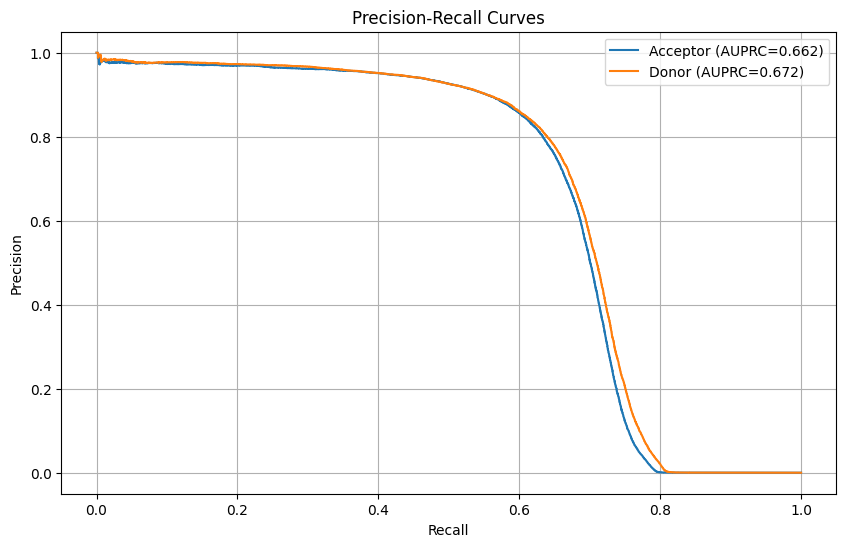

In [3]:
# Print results
print(f"Acceptor AUPRC: {acc_auprc:.4f}")
print(f"Donor AUPRC: {don_auprc:.4f}")
print(f"Mean AUPRC: {(acc_auprc + don_auprc) / 2:.4f}")

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(acc_recall, acc_precision, label=f'Acceptor (AUPRC={acc_auprc:.3f})')
plt.plot(don_recall, don_precision, label=f'Donor (AUPRC={don_auprc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Uncomment to debug splice site positions
def print_site_indices(truth_dict, pred_dict, threshold=0.9, max_sites=20):
    '''Print ground truth and predicted splice site indices for visual inspection.'''
    for chrom in truth_dict.keys():
        print(f"\n{chrom}:")
        # Get positions
        truth_pos = np.where(truth_dict[chrom] == 1)[0]
        pred_pos = np.where(pred_dict[chrom] > threshold)[0]
        
        print("Ground Truth Indices:", truth_pos[:max_sites].tolist())
        print("Predicted Indices:   ", pred_pos[:max_sites].tolist())

# Run comparison
print("Donor Sites:")
print_site_indices(donor_truth, donor_pred)

print("\nAcceptor Sites:")
print_site_indices(acceptor_truth, acceptor_pred)